In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("credit card.csv")
#Xem 5 hàng đầu tiên của tập dữ liệu
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [3]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [4]:
# Khám phá các loại giao dịch
print(data.type.value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


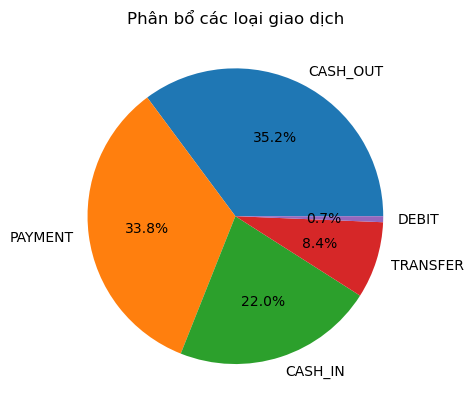

In [5]:
type = data.type.value_counts()
quantity = type.values
sum=type.values.sum()
figure = plt.pie((quantity/sum)*100, autopct = '%1.1f%%', labels=type.index)
plt.title("Phân bổ các loại giao dịch")
plt.show()

In [6]:
# kiểm tra mối tương quan
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation = numeric_data.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [7]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "Không gian lận", 1: "Gian lận"})
print(data.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest         isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  Không gian lận               0  
1  M2044282225             0.0             0.0  Không gian lận               0  
2   C553264065             0.0             0.0        Gian lận               0  
3    C38997010         21182.0             0.0        Gian lận               0  
4  M1230701703             0.0             0.0  Không gian lận               0  


In [8]:
# Mã hóa cột 'type'
data_encoded = pd.get_dummies(data, columns=['type'])

In [9]:
# Chọn các cột đặc trưng và nhãn
X = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = data['isFraud']

In [10]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Khởi tạo và huấn luyện mô hình SVM

from sklearn.svm import LinearSVC
svm_model = LinearSVC(tol=1e-4, max_iter=100)
svm_model.fit(X_train, y_train)


D:\Users\supro\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\Users\supro\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=100)

In [27]:
# Dự đoán và đánh giá mô hình
y_pred = svm_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
svm_accuracy = accuracy_score(y_test, y_pred_svm)  # Lưu trữ độ chính xác
print(f"Độ chính xác của SVM: {svm_accuracy:.4f}")

[[   1469     151]
 [   6149 1264755]]
                precision    recall  f1-score   support

      Gian lận       0.19      0.91      0.32      1620
Không gian lận       1.00      1.00      1.00   1270904

      accuracy                           1.00   1272524
     macro avg       0.60      0.95      0.66   1272524
  weighted avg       1.00      1.00      1.00   1272524

Độ chính xác của SVM: 0.9950


In [13]:
# Mẫu mới để dự đoán
sample = np.array([[4, 554026.9, 0.0, 0.0]])
# Dự đoán lớp cho mẫu mới
predicted_class = svm_model.predict(sample)[0]
# In kết quả dự đoán
print("Dự đoán cho mẫu mới:", predicted_class)

Dự đoán cho mẫu mới: Không gian lận
